In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# pandas option to display all columns when printing df.head()
pd.set_option('display.max_columns', None)

In [327]:
# reading the data 
# converting the 23rd column 'Unnamed 22' column to string, which originally had a mix of bool and NaN values (nan and False)
df = pd.read_csv('AmazonDataSales.csv', dtype={23: str})

In [328]:
# value counts for size column include nan
# print(df['size'].value_counts(dropna=False))

In [329]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [331]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

Cleaning the column names

In [332]:
# cleaning column names by trimming whitespaces, converting to lowercase, and replacing spaces with hyphens
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '-').str.replace('(', '').str.replace(')', '')
df.head()

,index,order-id,date,status,fulfilment,sales-channel,ship-service-level,style,sku,category,size,asin,courier-status,qty,currency,amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,b2b,fulfilled-by,unnamed:-22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [333]:
# only print columns with missing values and sort them by descending order by percentage
missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage[missing_percentage > 0].sort_values(ascending=False)

fulfilled-by        69.546811
promotion-ids       38.110487
unnamed:-22         38.030626
currency             6.043807
amount               6.043807
courier-status       5.328164
ship-city            0.025586
ship-state           0.025586
ship-postal-code     0.025586
ship-country         0.025586
dtype: float64

'fulfilled-by', 'Unnamed: 22', 'promotion-ids' columns has 34-69% missing values so we will drop those columns

In [334]:
# dropping columns with large number of missing values
df = df.drop(['unnamed:-22', 'fulfilled-by', 'promotion-ids'], axis=1)

In [335]:
# only print columns with missing values and sort them by descending order by percentage
missing_percentage[missing_percentage > 0].sort_values(ascending=False)

fulfilled-by        69.546811
promotion-ids       38.110487
unnamed:-22         38.030626
currency             6.043807
amount               6.043807
courier-status       5.328164
ship-city            0.025586
ship-state           0.025586
ship-postal-code     0.025586
ship-country         0.025586
dtype: float64

I found that 'currency' and 'Amount' has the same amount of NaN values and 'Courier Status' not too far behind <br>
Lets investigate if 'Courier Status' has any impact on relevant columns like 'Qty' and 'Amount' <br>
As we can see below, both 'Qty' and 'Amount' is 100% 0 and NaN when 'Courier Status' is filtered on "Cancelled"

In [336]:
# filter only columns with cancelled orders
cancelled_orders = df[df['courier-status'] == 'Cancelled']

# describe 'Qty' and 'Amount' columns of cancelled orders
cancelled_orders[['qty', 'amount']].describe()

,qty,amount
count,5935.0,0.0
mean,0.0,NaN
std,0.0,NaN
min,0.0,NaN
25%,0.0,NaN
50%,0.0,NaN
75%,0.0,NaN
max,0.0,NaN


Because our main assignment is to predict 'Amount' and not try to predict how many orders are being cancelled will be the deciding factor in dropping NaN Amounts

In [337]:
# drop the rows with NaN in 'Amount' column
df = df.dropna(subset=['amount'])

missing_percentages = df.isnull().sum() / len(df) * 100
missing_percentages[missing_percentages > 0].sort_values(ascending=False)

courier-status      4.238323
ship-city           0.025582
ship-state          0.025582
ship-postal-code    0.025582
ship-country        0.025582
dtype: float64

In [338]:
# value counts of 'Courier Status' column
df['courier-status'].value_counts(dropna=False)

# figure out why there are NaN values in 'Courier Status' column
df[df['courier-status'].isnull()]

,index,order-id,date,status,fulfilment,sales-channel,ship-service-level,style,sku,category,size,asin,courier-status,qty,currency,amount,ship-city,ship-state,ship-postal-code,ship-country,b2b
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False
23,23,404-6019946-2909948,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET291,SET291-KR-PP-M,Set,M,B099NK55YG,NaN,0,INR,570.48,pune,MAHARASHTRA,411044.0,IN,False
83,83,404-6522553-9345930,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET377,SET377-KR-NP-M,Set,M,B09TZV23QS,NaN,0,INR,1105.36,DEHRADUN,UTTARAKHAND,248001.0,IN,False
178,178,171-1224053-5752314,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0344,J0344-TP-L,Top,L,B0986XYFFP,NaN,0,INR,463.81,BENGALURU,KARNATAKA,560087.0,IN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128730,128730,403-2139190-8481165,06-01-22,Cancelled,Merchant,Amazon.in,Standard,JNE3797,JNE3797-KR-XL,Western Dress,XL,B09SDXRYBG,NaN,0,INR,700.00,Barabanki,UTTAR PRADESH,225001.0,IN,False
128761,128761,402-4651401-6366769,06-01-22,Cancelled,Merchant,Amazon.in,Standard,JNE3687,JNE3687-TU-S,Top,S,B0986XYZ4L,NaN,0,INR,519.05,BENGALURU,KARNATAKA,560043.0,IN,False
128762,128762,402-4651401-6366769,06-01-22,Cancelled,Merchant,Amazon.in,Standard,J0184,J0184-KR-A-S,kurta,S,B08V151HB2,NaN,0,INR,385.71,BENGALURU,KARNATAKA,560043.0,IN,False
128875,128875,403-9524128-9243508,06-01-22,Cancelled,Merchant,Amazon.in,Standard,JNE3797,JNE3797-KR-XL,Western Dress,XL,B09SDXRYBG,NaN,0,INR,734.29,Barabanki,UTTAR PRADESH,225001.0,IN,False


In [339]:
# how many Qty = 0
qty_zero = df[df['qty'] == 0].shape
# percentage of rows with Qty = 0
print(round(qty_zero[0]*100/len(df), 2), '% of rows have qty = 0')
print('-'*50)
# value counts of 'Courier Status' column when Qty = 0
print('courier-status when qty = 0')
print(df[df['qty'] == 0]['courier-status'].value_counts(dropna=False))
print('-'*50)
# value counts of 'Courier Status'
print(df['courier-status'].value_counts(dropna=False))

4.24 % of rows have qty = 0
--------------------------------------------------
courier-status when qty = 0
courier-status
NaN    5136
Name: count, dtype: int64
--------------------------------------------------
courier-status
Shipped      109487
Unshipped      6557
NaN            5136
Name: count, dtype: int64


In [340]:
# drop rows with Qty = 0
df = df[df['qty'] != 0]
# how many Qty = 0
qty_zero = df[df['qty'] == 0].shape
# percentage of rows with Qty = 0
print(round(qty_zero[0]*100/len(df), 2), '% of rows have qty = 0')
print('-'*50)
# value counts of 'Courier Status'
print(df['courier-status'].value_counts(dropna=False))

0.0 % of rows have qty = 0
--------------------------------------------------
courier-status
Shipped      109487
Unshipped      6557
Name: count, dtype: int64


In [341]:
# checking remaining columns with missing values
missing_percentages = df.isnull().sum() / len(df) * 100
ship_is_null = df['ship-city'].isnull().sum()
print(missing_percentages[missing_percentages > 0].sort_values(ascending=False))
print('-'*50)
print(f'Missing values in ship-* columns: {ship_is_null}')

ship-city           0.024129
ship-state          0.024129
ship-postal-code    0.024129
ship-country        0.024129
dtype: float64
--------------------------------------------------
Missing values in ship-* columns: 28


In [342]:
# print some rows where ship-city is missing values
df[df['ship-city'].isnull()].head()

,index,order-id,date,status,fulfilment,sales-channel,ship-service-level,style,sku,category,size,asin,courier-status,qty,currency,amount,ship-city,ship-state,ship-postal-code,ship-country,b2b
1871,1871,404-0566904-4825137,04-29-22,Shipped,Amazon,Amazon.in,Expedited,J0301,J0301-TP-L,Top,L,B099S6795L,Shipped,1,INR,493.0,NaN,NaN,NaN,NaN,False
1872,1872,404-0566904-4825137,04-29-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-L,kurta,L,B09811Y7WM,Shipped,1,INR,458.0,NaN,NaN,NaN,NaN,False
8752,8752,406-4003386-8768363,04-25-22,Shipped,Amazon,Amazon.in,Expedited,JNE3376,JNE3376-KR-M,kurta,M,B082W7HW86,Shipped,1,INR,432.0,NaN,NaN,NaN,NaN,False
11215,11215,402-0107720-7057168,04-23-22,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,S,B0894X27FC,Shipped,1,INR,654.0,NaN,NaN,NaN,NaN,False
15688,15688,404-9229894-8608305,04-21-22,Shipped,Amazon,Amazon.in,Expedited,JNE3510,JNE3510-KR-M,kurta,M,B08WPR5MCB,Shipped,1,INR,442.0,NaN,NaN,NaN,NaN,False


Because we only have 28 missing values in the geographic columns I decided to drop them aswell

In [343]:
# drop rows where ship-city is missing values
df = df.dropna(subset=['ship-city'])

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116016 entries, 1 to 128974
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               116016 non-null  int64  
 1   order-id            116016 non-null  object 
 2   date                116016 non-null  object 
 3   status              116016 non-null  object 
 4   fulfilment          116016 non-null  object 
 5   sales-channel       116016 non-null  object 
 6   ship-service-level  116016 non-null  object 
 7   style               116016 non-null  object 
 8   sku                 116016 non-null  object 
 9   category            116016 non-null  object 
 10  size                116016 non-null  object 
 11  asin                116016 non-null  object 
 12  courier-status      116016 non-null  object 
 13  qty                 116016 non-null  int64  
 14  currency            116016 non-null  object 
 15  amount              116016 non-null  fl

Converting the Date column to YYYY-MM-DD format 

In [345]:
# convert 'date' column to datetime and change format to YYYY-MM-DD
df['date'] = pd.to_datetime(df['date'], format='%m-%d-%y', errors='coerce')

# print the first 5 rows of the Date column
print(df['date'].head())

1   2022-04-30
2   2022-04-30
4   2022-04-30
5   2022-04-30
6   2022-04-30
Name: date, dtype: datetime64[ns]


In [346]:
df.head()

,index,order-id,date,status,fulfilment,sales-channel,ship-service-level,style,sku,category,size,asin,courier-status,qty,currency,amount,ship-city,ship-state,ship-postal-code,ship-country,b2b
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,560085.0,IN,False
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.0,CHENNAI,TAMIL NADU,600073.0,IN,False
5,5,404-1490984-4578765,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,XL,B08YN7XDSG,Shipped,1,INR,824.0,GHAZIABAD,UTTAR PRADESH,201102.0,IN,False
6,6,408-5748499-6859555,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,L,B08CMHNWBN,Shipped,1,INR,653.0,CHANDIGARH,CHANDIGARH,160036.0,IN,False


Standardizing the data by only having upper or lowercase in each string

In [347]:
# standardize column names
lower_columns = ['status', 'fulfilment', 'sales-channel', 'ship-service-level', 'category', 'courier-status', 'ship-city', 'ship-state']
upper_columns = ['sku', 'asin', 'ship-country', 'currency', 'size']

df[lower_columns] = df[lower_columns].apply(lambda x: x.str.lower())
df[upper_columns] = df[upper_columns].apply(lambda x: x.str.upper())

In [348]:
# count unique in ship-city
unique_ship_state = df['ship-state'].nunique()
unique_ship_city = df['ship-city'].nunique()
print(f'Unique ship state: {unique_ship_state}')
print(f'Unique ship city: {unique_ship_city}')
print('-'*64)
# how many ahmedabad variations there are
ahmedabad_count = df[df['ship-city'].str.contains('ahmedabad')]['ship-city'].nunique()
print(f'Ahmedabad count: {ahmedabad_count}')
print(df[df['ship-city'].str.contains('ahmedabad')]['ship-city'].unique())


Unique ship state: 46
Unique ship city: 6932
----------------------------------------------------------------
Ahmedabad count: 19
['ahmedabad' 'ahmedabad 380013' 'ahmedabad 380014' 'ahmedabad,'
 'ahmedabad.' 'dholka, ahmedabad' 'ahmedabad 380007' 'ranip,ahmedabad'
 'south bopal, ahmedabad' 'ahmedabadvasna' 'bodakdev, ahmedabad'
 'chandlodia, ahmedabad'
 'r.c. technical college road, ghatlodia, ahmedabad'
 'chandkheda, ahmedabad' 'bopal ahmedabad' 'khodiyar, ahmedabad'
 'bapunagar,ahmedabad' 'shela, ahmedabad' 'sg highway ahmedabad']


In [349]:
# clean and preprocess ship-city names
#df['ship-city'] = df['ship-city'].str.lower()  # Convert to lowercase
#df['ship-city'] = df['ship-city'].str.replace(r"[^a-zA-Z\s]", "", regex=True)  # Remove extra characters

In [350]:
def clean_city_name(city):
    # Convert to lowercase and strip spaces
    city = city.lower().strip()
    # Check if 'ahmedabad' is in the string
    if 'ahmedabad' in city:
        return 'ahmedabad'
    else:
        return city  # Return the original city if not a variant of Ahmedabad

# Apply this function to your 'ship-city' column
df['ship-city'] = df['ship-city'].apply(clean_city_name)

# list all variations of ahmedabad in ship-city
ahmedabad_variations = df[df['ship-city'].str.contains('ahmedabad')]['ship-city'].unique()
print(ahmedabad_variations)

['ahmedabad']


In [351]:
# list all the variations of hyderabad and count them
hyderabad_variations = df[df['ship-city'].str.contains('hyderabad')]['ship-city'].unique()
hyderabad_count = df[df['ship-city'].str.contains('hyderabad')]['ship-city'].nunique()
print(hyderabad_variations)
print('-'*64)
print(f'Variations of Hyderabad: ', hyderabad_count)

['hyderabad' 'phanigiri road,chaitanyapuri,hyderabad' 'hyderabad,'
 'hyderabad (500034)' ',hyderabad' 'medipally ,hyderabad'
 'jillelguda , meerpet , hyderabad' 'hyderabad,rangareddy'
 'hyderabad, ranga reddy' 'kondapur, hyderabad' 'gachibowli / hyderabad'
 'miyapur, hyderabad' 'tarnaka, hyderabad' 'bachupally, hyderabad'
 'hyderabad .' 'mehdipatnam, hyderabad' 'madhapur, hyderabad'
 'bibinagar hyderabad' 'malkajgiri, hyderabad' 'hyderabad-47'
 'perzaadiguda, hyderabad' 'boduppal, hyderabad - 92'
 'nizampet village, ranga reddy district, hyderabad' 'hyderabadyderabad'
 'hayathnagar, hyderabad' 'hyderabad.' 'ameenpur hyderabad'
 'ecil,hyderabad' 'miyapur ,hyderabad' 'kukatpally, hyderabad'
 'kanchanbagh  hyderabad' 'lunger houz , hyderabad'
 'rangareddy district,hyderabad' 'chandanagar, hyderabad'
 'hyderabad, telangana' 'hyderabad telangana' 'rudraram, hyderabad'
 'hyderabad-500018' 'miyapur hyderabad'
 'bapu nagar, sanjeeva reddy nagar, hyderabad' 'bagh amberpet,hyderabad'
 'uppal, hy

In [352]:
# print indian_cities_df where city is hyderabad
indian_cities_df = pd.read_csv('indian_cities.csv', header=None, names=['city'])
indian_cities_df['city'] = indian_cities_df['city'].str.lower()
indian_cities_df[indian_cities_df['city'] == 'hyderabad']

,city
216,hyderabad


In [353]:
standard_cities = indian_cities_df['city'].tolist()
def map_to_standard_city(city, standard_cities):
    # Check if any standard city is a substring of the city in question
    for standard_city in standard_cities:
        if standard_city in city:
            return standard_city
    return city

# Apply the mapping function
df['ship-city'] = df['ship-city'].apply(lambda x: map_to_standard_city(x, standard_cities))

# Now check the variations of 'Hyderabad'
hyderabad_variations_after = df[df['ship-city'].str.contains('hyderabad', case=False, na=False)]
print("Variations of Hyderabad after cleaning:", hyderabad_variations_after['ship-city'].unique())
# compare unique values of ship-city and cleaned_ship_city
print(df['ship-city'].nunique())



Variations of Hyderabad after cleaning: ['hyderabad']
4962


In [354]:
# print variations of hyderabad
hyderabad_variations = df[df['ship-city'].str.contains('hyder')]['ship-city'].unique()
print(hyderabad_variations)

['hyderabad' 'hyderbad' 'hyderaba']


In [355]:
df.head()

,index,order-id,date,status,fulfilment,sales-channel,ship-service-level,style,sku,category,size,asin,courier-status,qty,currency,amount,ship-city,ship-state,ship-postal-code,ship-country,b2b
1,1,171-9198151-1101146,2022-04-30,shipped - delivered to buyer,merchant,amazon.in,standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,shipped,1,INR,406.0,bengaluru,karnataka,560085.0,IN,False
2,2,404-0687676-7273146,2022-04-30,shipped,amazon,amazon.in,expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,shipped,1,INR,329.0,mumbai,maharashtra,410210.0,IN,True
4,4,407-1069790-7240320,2022-04-30,shipped,amazon,amazon.in,expedited,JNE3671,JNE3671-TU-XXXL,top,3XL,B098714BZP,shipped,1,INR,574.0,chennai,tamil nadu,600073.0,IN,False
5,5,404-1490984-4578765,2022-04-30,shipped,amazon,amazon.in,expedited,SET264,SET264-KR-NP-XL,set,XL,B08YN7XDSG,shipped,1,INR,824.0,ghaziabad,uttar pradesh,201102.0,IN,False
6,6,408-5748499-6859555,2022-04-30,shipped,amazon,amazon.in,expedited,J0095,J0095-SET-L,set,L,B08CMHNWBN,shipped,1,INR,653.0,chandigarh,chandigarh,160036.0,IN,False


Columns to drop by relevance: <br>
- index - Not helpful for predicting amount <br>
- order-id - Not helpful for predicint amount <br>
- sku - Another identifier, not helpful for predicting amount <br>
- asin - Another identifier, not helpful for predicting amount <br>
- currency - Since we only have one currency (INR), this column will not provide any value to the model <br>
- ship-country - All the orders are placed in India (IN) so dropping it for the same reason as currency <br>

In [356]:
# drop columns that are not needed
df = df.drop(['index', 'order-id', 'sku', 'asin', 'currency', 'ship-country', 'sales-channel', 'sales-channel'], axis=1)
df.head()

,date,status,fulfilment,ship-service-level,style,category,size,courier-status,qty,amount,ship-city,ship-state,ship-postal-code,b2b
1,2022-04-30,shipped - delivered to buyer,merchant,standard,JNE3781,kurta,3XL,shipped,1,406.0,bengaluru,karnataka,560085.0,False
2,2022-04-30,shipped,amazon,expedited,JNE3371,kurta,XL,shipped,1,329.0,mumbai,maharashtra,410210.0,True
4,2022-04-30,shipped,amazon,expedited,JNE3671,top,3XL,shipped,1,574.0,chennai,tamil nadu,600073.0,False
5,2022-04-30,shipped,amazon,expedited,SET264,set,XL,shipped,1,824.0,ghaziabad,uttar pradesh,201102.0,False
6,2022-04-30,shipped,amazon,expedited,J0095,set,L,shipped,1,653.0,chandigarh,chandigarh,160036.0,False


In [357]:
# lets check the remaining columns in df if there are any columns that only has 1 unique value
for col in df.columns:
    print(f'{col}: {df[col].nunique()}')

date: 91
status: 12
fulfilment: 2
ship-service-level: 2
style: 1371
category: 9
size: 11
courier-status: 2
qty: 6
amount: 867
ship-city: 4962
ship-state: 46
ship-postal-code: 9142
b2b: 2


Feature Engineering <br>


In [358]:
# value counts of fulfilment before encoding
print('Before:')
print(df['fulfilment'].value_counts())

print('\n')

# list the column that are possible to be binary encoded (only 2 unique values)
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
print(f'Columns with only 2 unique values: ', binary_cols)
# convert to binary, 0 for False and 1 for True or first unique value 0 and second unique value 1
for col in binary_cols:
    df[col] = df[col].astype('category').cat.codes

print('\n')

print('After: ')
# value counts of fulfilment after encoding
print(df['fulfilment'].value_counts())

Before:
fulfilment
amazon      83621
merchant    32395
Name: count, dtype: int64


Columns with only 2 unique values:  ['fulfilment', 'ship-service-level', 'courier-status', 'b2b']


After: 
fulfilment
0    83621
1    32395
Name: count, dtype: int64


In [359]:
# date range
print(df['date'].min())
print(df['date'].max())

2022-03-31 00:00:00
2022-06-29 00:00:00


In [360]:
df['month'] = df['date'].dt.month
df['day_of_month'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek # monday=0, sunday=6
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
# print the new columns
df[['date', 'month', 'day_of_month', 'day_of_week', 'is_weekend']]

,date,month,day_of_month,day_of_week,is_weekend
1,2022-04-30,4,30,5,1
2,2022-04-30,4,30,5,1
4,2022-04-30,4,30,5,1
5,2022-04-30,4,30,5,1
6,2022-04-30,4,30,5,1
...,...,...,...,...,...
128970,2022-05-31,5,31,1,0
128971,2022-05-31,5,31,1,0
128972,2022-05-31,5,31,1,0
128973,2022-05-31,5,31,1,0


In [361]:
# inspect the status column
df['status'].value_counts()

status
shipped                          77580
shipped - delivered to buyer     28754
cancelled                         5628
shipped - returned to seller      1947
shipped - picked up                973
pending                            656
pending - waiting for pick up      281
shipped - returning to seller      145
shipped - out for delivery          35
shipped - rejected by buyer         11
shipped - lost in transit            5
shipped - damaged                    1
Name: count, dtype: int64

In [362]:
# function to simplify the status categories
def simplify_status(status):
    if 'shipped' in status and 'cancelled' not in status and 'pending' not in status:
        return 'shipped'
    elif 'cancelled' in status:
        return 'cancelled'
    elif 'pending' in status:
        return 'pending'
    else:
        return 'other'

# apply the function to the 'status' column
df['status'] = df['status'].apply(simplify_status)

In [363]:
# inspect the status column agin
df['status'].value_counts(dropna=False)

status
shipped      109451
cancelled      5628
pending         937
Name: count, dtype: int64

One-hot Encoding the status column will give us 3 columns, to avoid multicollinearity we will drop the column 'shipped' which also has True majority. <br>
Reasons:

In [364]:
# onehot encode the status column and keep status_ in the column name, we are also dropping the 'shipped' column to avoid multicollinearity
df = pd.get_dummies(df, columns=['status'], prefix='status', drop_first=True)
df.head()

,date,fulfilment,ship-service-level,style,category,size,courier-status,qty,amount,ship-city,ship-state,ship-postal-code,b2b,month,day_of_month,day_of_week,is_weekend,status_pending,status_shipped
1,2022-04-30,1,1,JNE3781,kurta,3XL,0,1,406.0,bengaluru,karnataka,560085.0,0,4,30,5,1,False,True
2,2022-04-30,0,0,JNE3371,kurta,XL,0,1,329.0,mumbai,maharashtra,410210.0,1,4,30,5,1,False,True
4,2022-04-30,0,0,JNE3671,top,3XL,0,1,574.0,chennai,tamil nadu,600073.0,0,4,30,5,1,False,True
5,2022-04-30,0,0,SET264,set,XL,0,1,824.0,ghaziabad,uttar pradesh,201102.0,0,4,30,5,1,False,True
6,2022-04-30,0,0,J0095,set,L,0,1,653.0,chandigarh,chandigarh,160036.0,0,4,30,5,1,False,True


In [365]:
# list columns that has more than 2 unique values for onehot encoding
cols_to_onehotencode = [col for col in df.columns if df[col].nunique() > 2]
# print a table so we can see how many unique values each column has in cols_to_onehotencode
print('Columns with more than 2 unique values: ')
for col in cols_to_onehotencode:
    print(f'{col}: {df[col].nunique()}')

Columns with more than 2 unique values: 
date: 91
style: 1371
category: 9
size: 11
qty: 6
amount: 867
ship-city: 4962
ship-state: 46
ship-postal-code: 9142
month: 4
day_of_month: 31
day_of_week: 7


Linear Regression or Decision Tree 

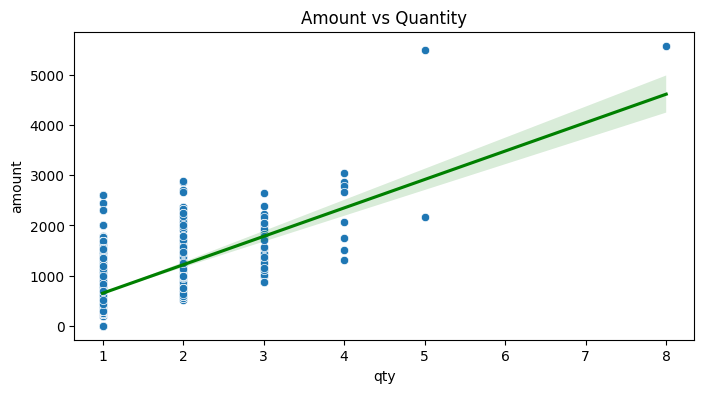

In [366]:
# scatter plot for 'amount' vs 'quantity'
plt.figure(figsize=(8, 4))
sns.scatterplot(x='qty', y='amount', data=df)
sns.regplot(x='qty', y='amount', data=df, scatter=False, color='green')
plt.title('Amount vs Quantity')
plt.show()

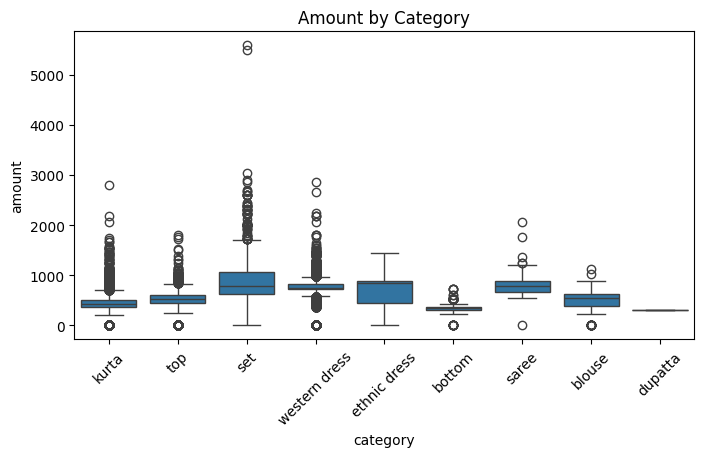

In [367]:
# box plot for 'amount' by 'category'
plt.figure(figsize=(8, 4))
sns.boxplot(x='category', y='amount', data=df)
plt.title('Amount by Category')
plt.xticks(rotation=45)
plt.show()

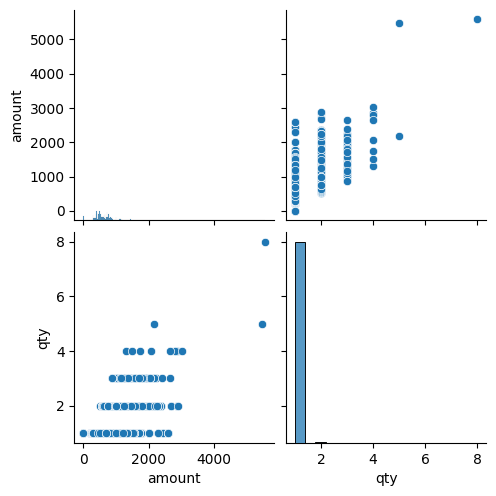

In [368]:
# pair plot for a subset of features
sns.pairplot(df[['amount', 'qty', 'category']])
plt.show()

In [369]:
# df.corr and sort values based on 'amount' only take numerical columns
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()
# correlation matrix
corr = df[numerical_columns].corr()
# sort values based on 'amount'
corr['amount'].sort_values(ascending=False)

amount                1.000000
qty                   0.145780
month                 0.052362
b2b                   0.015918
day_of_month          0.012141
courier-status        0.011047
day_of_week           0.002661
is_weekend            0.002453
fulfilment            0.001634
ship-service-level   -0.036007
ship-postal-code     -0.038047
Name: amount, dtype: float64

Feature Selection

In [370]:
df.head()

,date,fulfilment,ship-service-level,style,category,size,courier-status,qty,amount,ship-city,ship-state,ship-postal-code,b2b,month,day_of_month,day_of_week,is_weekend,status_pending,status_shipped
1,2022-04-30,1,1,JNE3781,kurta,3XL,0,1,406.0,bengaluru,karnataka,560085.0,0,4,30,5,1,False,True
2,2022-04-30,0,0,JNE3371,kurta,XL,0,1,329.0,mumbai,maharashtra,410210.0,1,4,30,5,1,False,True
4,2022-04-30,0,0,JNE3671,top,3XL,0,1,574.0,chennai,tamil nadu,600073.0,0,4,30,5,1,False,True
5,2022-04-30,0,0,SET264,set,XL,0,1,824.0,ghaziabad,uttar pradesh,201102.0,0,4,30,5,1,False,True
6,2022-04-30,0,0,J0095,set,L,0,1,653.0,chandigarh,chandigarh,160036.0,0,4,30,5,1,False,True


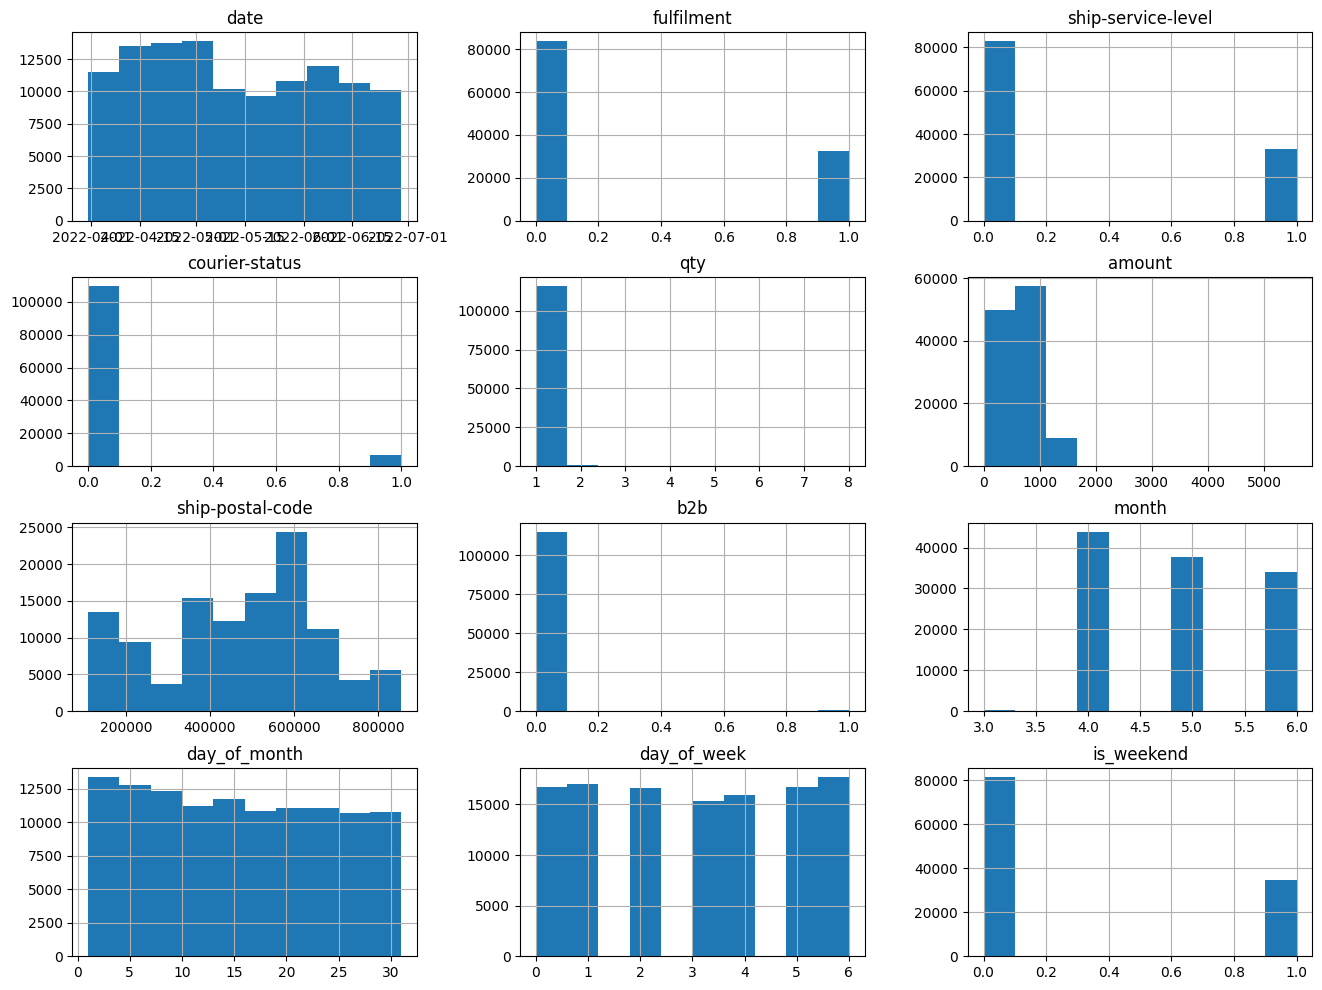

In [371]:
# distribution of columns
df.hist(figsize=(16, 12))
plt.show()

In [372]:
# stats for qty and amount
print('qty: ', df['qty'].describe())
print('-'*64)
print('amount: ', df['amount'].describe())

qty:  count    116016.000000
mean          1.003775
std           0.072651
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           8.000000
Name: qty, dtype: float64
----------------------------------------------------------------
amount:  count    116016.000000
mean        649.780849
std         282.648892
min           0.000000
25%         449.000000
50%         606.000000
75%         788.000000
max        5584.000000
Name: amount, dtype: float64


The 'month' feature as we can see below, wont provide value to our model

In [373]:
# group by sales by month
monthly_sales = df.groupby('month')['amount'].sum().reset_index()
monthly_sales

,month,amount
0,3,98261.0
1,4,27575532.0
2,5,25112855.0
3,6,22598327.0


In [374]:
# feature selection
# drop columns that are not needed
df = df.drop(['date', 'style', 'month', 'ship-city', 'ship-state', 'ship-postal-code', 'day_of_month', 'day_of_week', 'is_weekend'], axis=1)
df.head()

,fulfilment,ship-service-level,category,size,courier-status,qty,amount,b2b,status_pending,status_shipped
1,1,1,kurta,3XL,0,1,406.0,0,False,True
2,0,0,kurta,XL,0,1,329.0,1,False,True
4,0,0,top,3XL,0,1,574.0,0,False,True
5,0,0,set,XL,0,1,824.0,0,False,True
6,0,0,set,L,0,1,653.0,0,False,True


In [375]:
# which remaining columns has only 1 unique value
single_value_cols = [col for col in df.columns if df[col].nunique() == 1]
print(f'Columns with only 1 unique value: ', single_value_cols)
print('-'*50)
# which remaining columns has 2 unique values
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
print(f'Columns with only 2 unique values: ', binary_cols)
print('-'*50)
# which remaining columns has more than 2 unique values
cols_to_onehotencode = [col for col in df.columns if df[col].nunique() > 2]
print('Columns with more than 2 unique values: ')
for col in cols_to_onehotencode:
    print(f'{col}: {df[col].nunique()}')

Columns with only 1 unique value:  []
--------------------------------------------------
Columns with only 2 unique values:  ['fulfilment', 'ship-service-level', 'courier-status', 'b2b', 'status_pending', 'status_shipped']
--------------------------------------------------
Columns with more than 2 unique values: 
category: 9
size: 11
qty: 6
amount: 867


In [376]:
# check data types of binary_cols
df[binary_cols].dtypes

fulfilment            int8
ship-service-level    int8
courier-status        int8
b2b                   int8
status_pending        bool
status_shipped        bool
dtype: object

In [377]:
# convert status cols to int
df[binary_cols] = df[binary_cols].astype('int')

In [378]:
# onehot encode the remaining columns
cols_to_onehotencode = ['category', 'size']
df = pd.get_dummies(df, columns=cols_to_onehotencode, drop_first=True)
# convert the new columns to int (if col name includes category or size)
df[[col for col in df.columns if 'category' in col or 'size' in col]] = df[[col for col in df.columns if 'category' in col or 'size' in col]].astype('int')
df.head()

,fulfilment,ship-service-level,courier-status,qty,amount,b2b,status_pending,status_shipped,category_bottom,category_dupatta,category_ethnic dress,category_kurta,category_saree,category_set,category_top,category_western dress,size_4XL,size_5XL,size_6XL,size_FREE,size_L,size_M,size_S,size_XL,size_XS,size_XXL
1,1,1,0,1,406.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,329.0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,574.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,824.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,1,653.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [379]:
# log transformation of 'amount' column
#df['amount'] = np.log1p(df['amount'])

# log transformation of 'qty' column
#df['qty'] = np.log1p(df['qty'])

In [380]:
# scale the 'qty' column
#scaler = preprocessing.StandardScaler()
#df['qty'] = scaler.fit_transform(df[['qty']])
#df['qty'].describe()

In [381]:
# glimse of the columns
df.head(1)

,fulfilment,ship-service-level,courier-status,qty,amount,b2b,status_pending,status_shipped,category_bottom,category_dupatta,category_ethnic dress,category_kurta,category_saree,category_set,category_top,category_western dress,size_4XL,size_5XL,size_6XL,size_FREE,size_L,size_M,size_S,size_XL,size_XS,size_XXL
1,1,1,0,1,406.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [382]:
# testing dropping some columns
df = df.drop(['fulfilment', 'ship-service-level', 'b2b', 'status_pending', 'status_shipped', 'courier-status'], axis=1)
#df = df.drop(['category_top','category_bottom', 'size_FREE', 'category_dupatta', 'category_kurta', 'ship-service-level', 'status_pending', 'status_shipped', 'courier-status', 'b2b', 'fulfilment', 'size_XS', 'size_XXL', 'size_L', 'size_XL', 'size_S', 'size_M' ], axis=1)

In [383]:
# corr matrix
corr = df.corr()
# sort values based on 'amount'
corr['amount'].sort_values(ascending=False)

amount                    1.000000
category_set              0.523168
category_western dress    0.150374
qty                       0.145780
size_6XL                  0.046525
size_5XL                  0.038117
size_XS                   0.036428
size_4XL                  0.035417
category_ethnic dress     0.025259
size_S                    0.024479
category_saree            0.019088
size_M                    0.006706
category_dupatta         -0.006203
size_FREE                -0.013547
size_L                   -0.020091
size_XL                  -0.026731
size_XXL                 -0.035754
category_bottom          -0.060430
category_top             -0.131934
category_kurta           -0.540777
Name: amount, dtype: float64

In [384]:
# split the data into train and test sets
X = df.drop('amount', axis=1)
y = df['amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print the features
print(f'Features: {X.columns}')
print('-'*50)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

Features: Index(['qty', 'category_bottom', 'category_dupatta', 'category_ethnic dress',
       'category_kurta', 'category_saree', 'category_set', 'category_top',
       'category_western dress', 'size_4XL', 'size_5XL', 'size_6XL',
       'size_FREE', 'size_L', 'size_M', 'size_S', 'size_XL', 'size_XS',
       'size_XXL'],
      dtype='object')
--------------------------------------------------
X_train shape: (92812, 19)
X_test shape: (23204, 19)
y_train shape: (92812,)
y_test shape: (23204,)


In [385]:
X.head()

,qty,category_bottom,category_dupatta,category_ethnic dress,category_kurta,category_saree,category_set,category_top,category_western dress,size_4XL,size_5XL,size_6XL,size_FREE,size_L,size_M,size_S,size_XL,size_XS,size_XXL
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [386]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

def evaluate_models(X, y):
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor()
    }

    model_scores = {}

    for name, model in models.items():
        # Cross-validate the model and calculate the mean R2 score
        r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
        model_scores[name] = r2_scores.mean()
        print(f"{name}: Mean R2 score = {r2_scores.mean():.3f}")

    return model_scores

model_scores = evaluate_models(X_train, y_train)


Linear Regression: Mean R2 score = 0.431
Decision Tree: Mean R2 score = 0.431


In [387]:
# create a linear regression model
lr_model = linear_model.LinearRegression()
# train the model
lr_model.fit(X_train, y_train)
# make predictions on the test set
y_pred = lr_model.predict(X_test)
# calculate the mean squared error
lr_mse = mean_squared_error(y_test, y_pred)
# print the mse
print('MSE: ', lr_mse)
# print the rmse
print('RMSE: ', np.sqrt(lr_mse))
# calculate r2 score
lr_r2 = r2_score(y_test, y_pred)
# print the R squared value
print('R^2: ', lr_r2)

MSE:  45757.38472089314
RMSE:  213.90975835826924
R^2:  0.4279982589506469


In [388]:
# create a decision tree regressor model
dtree_model = DecisionTreeRegressor(random_state=42)
# train the model
dtree_model.fit(X_train, y_train)
# make predictions on the test set
y_pred = dtree_model.predict(X_test)
# calculate the mean squared error
dtree_mse = mean_squared_error(y_test, y_pred)
# print the mse
print('MSE: ', dtree_mse)
# print the rmse
print('RMSE: ', np.sqrt(dtree_mse))
# calculate r2 score
dtree_r2 = r2_score(y_test, y_pred)
# print the R squared value
print('R^2: ', dtree_r2)

MSE:  45666.18187062082
RMSE:  213.69647135743918
R^2:  0.4291383632084108


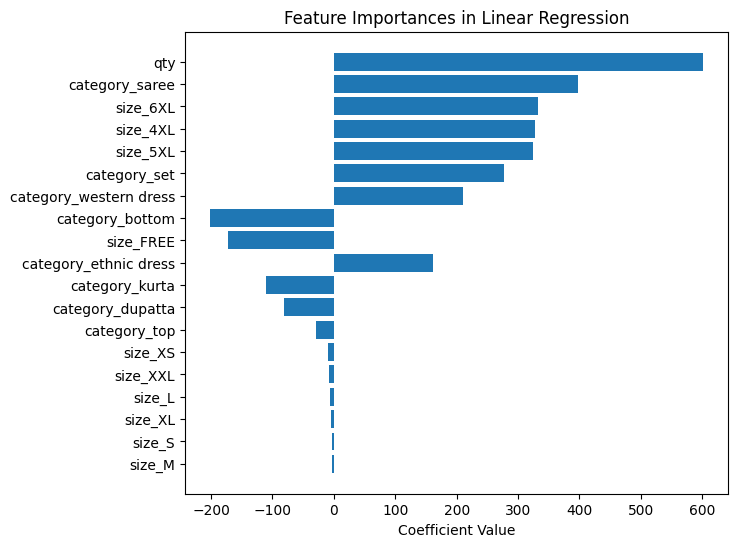

In [389]:
coefficients = lr_model.coef_
sorted_indices = np.argsort(np.abs(coefficients))[::-1]

plt.figure(figsize=(7, 6))
plt.title('Feature Importances in Linear Regression')
plt.barh(range(X.shape[1]), coefficients[sorted_indices], align='center')
plt.yticks(range(X.shape[1]), [X.columns[i] for i in sorted_indices])
plt.xlabel('Coefficient Value')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()